# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies

import random
from citipy import citipy

    #API
import requests  #enable making web requests to access and use RESTful API endpoints 
from config import (weather_api_key, g_key)  #Open weather and Google Maps and Places API keys
import json

    #Data manipulation
import numpy as np  #provides fast mathematical computation on arrays and matrices
import pandas as pd  #open source library provides high-performance, easy-to-use data structures and data analysis tools.

    #Data visualisation   
import gmaps  #Embed google maps
from scipy.stats import linregress  #collection of mathematical algorithms and convenience functions - adds significant power to the interactive Python session - manipulating and visualizing data.
from matplotlib import pyplot as plt  #Plotting library
#For linear regression
import scipy.stats as st

#gmaps.configure(api_key=g_key)

## Generate Cities List

In [2]:
#create a latitude range of 600 items  - random numbers from -90 to +90 - need 2 decimal places
#create a longitude range of 600 items - random numbers from -180 to 180 - need 2 decimal places
    #https://pynative.com/python-get-random-float-numbers/

LatList = []
LongList = []
for lat in range(0,1500):
    LatList.append(round(random.uniform(-90, 90), 2))   
    LongList.append(round(random.uniform(-180, 180), 2))


#lat = np.random.uniform(low=-90.000, high=90.000, 600)
#Long = np.random.uniform(low=-180.000, high=180.000, 600)


#Test data
#print(LatList, LongList)
#print(LatList[0], LongList[0])
#print(len(LatList), len(LongList))


In [3]:
#Coords = zip(LatList, LongList)
#Coords


In [4]:
#I think in need to do a dataframe with the two lists
coords = pd.DataFrame(list(zip(LatList, LongList)), 
              columns =['Latitiude', 'Longitude'])
coords.head(2)

,Latitiude,Longitude
0,41.49,20.51
1,66.19,-81.67


In [5]:
#Test Data
#city1 = citipy.nearest_city (50.58, -162.63)
#print(city1.city_name)

#city2 = citipy.nearest_city (40.46, 72.85)
#print(city2.city_name)

In [6]:
#Test Data
#citytest = citipy.nearest_city (LatList[0], LongList[0])
#print(citytest.city_name)

#citytest2 = citipy.nearest_city (LatList[1], LongList[1])
#print(citytest2.city_name)

In [7]:
#Test Data
#cityzip = citipy.nearest_city(coords["Latitiude"][0], coords["Longitude"][0])
#print(cityzip.city_name)

#cityzip2 = citipy.nearest_city(coords["Latitiude"][1], coords["Longitude"][1])
#print(cityzip2.city_name)

In [8]:
#Create a new City column in coords

coords['City'] = "" 

coords.head(2)

,Latitiude,Longitude,City
0,41.49,20.51,
1,66.19,-81.67,


In [9]:
#create an empty city list
cities = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

for x in range(0,len(coords)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    cityname = cityget.city_name
    
    cities.append(cityname)
    
coords['City'] = cities
coords

,Latitiude,Longitude,City
0,41.49,20.51,debar
1,66.19,-81.67,attawapiskat
2,89.27,-167.79,barrow
3,22.43,-7.61,taoudenni
4,27.63,-155.91,ahuimanu
...,...,...,...
1495,20.68,163.84,butaritari
1496,32.92,82.80,jumla
1497,86.83,-130.53,tuktoyaktuk
1498,1.08,-173.68,vaitupu


In [10]:
#removed duplicates
# Getting the duplicate cities
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
coordsduplicates = coords[coords.duplicated(['City'])]
coordsduplicates

,Latitiude,Longitude,City
11,-65.78,-118.96,rikitea
18,-32.80,-117.96,rikitea
27,-27.01,-110.40,rikitea
42,-46.91,-100.25,castro
49,-69.11,58.24,taolanaro
...,...,...,...
1493,-75.18,-114.75,punta arenas
1494,84.13,-122.35,tuktoyaktuk
1495,20.68,163.84,butaritari
1497,86.83,-130.53,tuktoyaktuk


In [11]:
# First create a list of the indexes that are duplicates
duplicateindex = coordsduplicates.index
print(duplicateindex)
len(duplicateindex)

Int64Index([  11,   18,   27,   42,   49,   50,   54,   56,   58,   61,
            ...
            1485, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1497, 1498],
           dtype='int64', length=912)


912

In [12]:
#Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
coordsunique = coords.drop(coords.index[[duplicateindex]])

print(len(coordsunique))
coordsunique.head(30)

588


,Latitiude,Longitude,City
0,41.49,20.51,debar
1,66.19,-81.67,attawapiskat
2,89.27,-167.79,barrow
3,22.43,-7.61,taoudenni
4,27.63,-155.91,ahuimanu
5,-81.50,-49.78,ushuaia
6,-49.24,0.67,cape town
7,7.53,-114.95,san patricio
8,1.67,-18.69,bonthe
9,37.19,94.09,yumen


In [13]:
#Missing indexes - reset index
coordsunique.index=range(0,len(coordsunique))
print(len(coordsunique))
coordsunique.head(30)

588


,Latitiude,Longitude,City
0,41.49,20.51,debar
1,66.19,-81.67,attawapiskat
2,89.27,-167.79,barrow
3,22.43,-7.61,taoudenni
4,27.63,-155.91,ahuimanu
5,-81.50,-49.78,ushuaia
6,-49.24,0.67,cape town
7,7.53,-114.95,san patricio
8,1.67,-18.69,bonthe
9,37.19,94.09,yumen


In [14]:
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coordsunique)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    #cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    #cityname = cityget.city_name
    
    #if cityname not in cities:
     #   cities.append(cityname)
    #else:
    #    duplicates.append(cityname)

#print(len(cities))
    

#unique_words = set(cities)             # == set(['a', 'b', 'c'])
#unique_word_count = len(unique_words) # == 3
#unique_words

In [15]:
#Don't need this but keep as working for loop if above duplicate cell with removing duplicates doesn't work
#create an empty city list
#cities = []
#duplicates = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

#for x in range(0,len(coords)):
#    #print(coords["Latitiude"][x], coords["Longitude"][x])
#    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
#    cityname = cityget.city_name
#    cities.append(cityname)

#print(len(cities))
    
    
   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [17]:
#Test URL
#print(query_url + cities[0])

In [18]:
# Test Retrieving data and converting it into JSON
#print(requests.get(query_url + cities[0]).json())

In [19]:
# Test Pretty Print the output of the JSON
responsetest1 = requests.get(query_url + coordsunique["City"][1]).json()
print(json.dumps(responsetest1, indent=4, sort_keys=True))
responsetest2 = requests.get(query_url + coordsunique["City"][2]).json()
print(json.dumps(responsetest2, indent=4, sort_keys=True))
responsetest3 = requests.get(query_url + coordsunique["City"][3]).json()
print(json.dumps(responsetest3, indent=4, sort_keys=True))

{
    "cod": "404",
    "message": "city not found"
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 71.2906,
        "lon": -156.7887
    },
    "dt": 1610528446,
    "id": 5880054,
    "main": {
        "feels_like": -29.18,
        "humidity": 78,
        "pressure": 1005,
        "temp": -18,
        "temp_max": -18,
        "temp_min": -18
    },
    "name": "Barrow",
    "sys": {
        "country": "US",
        "id": 7649,
        "sunrise": 0,
        "sunset": 0,
        "type": 1
    },
    "timezone": -32400,
    "visibility": 9656,
    "weather": [
        {
            "description": "haze",
            "icon": "50n",
            "id": 721,
            "main": "Haze"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 10.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 22.6783,
        "lon": -3.9836
    },
    "dt": 1610

In [21]:
#Test calling a specific value
#print(responsetest1["main"]["temp"])

#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])
#print("" + responsetest1["sys"]["country"])

In [22]:
coordsunique

,Latitiude,Longitude,City
0,41.49,20.51,debar
1,66.19,-81.67,attawapiskat
2,89.27,-167.79,barrow
3,22.43,-7.61,taoudenni
4,27.63,-155.91,ahuimanu
...,...,...,...
583,44.18,-110.46,jackson
584,31.71,-48.18,saint george
585,16.96,-68.90,la romana
586,32.92,82.80,jumla


In [24]:
#responsetest20 = requests.get(query_url + coordsunique["City"][20]).json()
#responsetest21 = requests.get(query_url + coordsunique["City"][21]).json()
#responsetest22 = requests.get(query_url + coordsunique["City"][22]).json()
#responsetest23 = requests.get(query_url + coordsunique["City"][23]).json()
#print(json.dumps(responsetest20, indent=4, sort_keys=True))
#print(json.dumps(responsetest21, indent=4, sort_keys=True))
#print(json.dumps(responsetest22, indent=4, sort_keys=True))
#print(json.dumps(responsetest23, indent=4, sort_keys=True))

#print("Processing Record " + str(coordsunique.index[23+1]) + " | " + coordsunique["City"][23])

#convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
#print(convertdate)  
#print(responsetest1["main"]["temp"])
#print(responsetest1["main"]["humidity"])
#print(responsetest1["clouds"]["all"])
#print(responsetest1["wind"]["speed"])


#print(coordsunique["City"][21])
#requests.get(query_url + coordsunique["City"][20])
#requests.get(query_url + coordsunique["City"][21])



In [25]:
for g in range(0,10):
    print(coordsunique.index[g])

0
1
2
3
4
5
6
7
8
9


In [28]:
countryt = []
datetimet = []
tempst = []
humidt = []
cloudt = []
windt = []
for t in range(0,25):
    
    
    responsetest1 = requests.get(query_url + coordsunique["City"][t]).json()
    
    if responsetest1["cod"] != "404":
    
    #if responsetest1.cod != 200:
    #    continue
        try:
            print(str((coordsunique.index[t])+1) + " Retrieving data for " + coordsunique["City"][t])
            countryt.append(responsetest1["sys"]["country"])
            convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
            datetimet.append(convertdate)  
            tempst.append(responsetest1["main"]["temp"])
            humidt.append(responsetest1["main"]["humidity"])
            cloudt.append(responsetest1["clouds"]["all"])
            windt.append(responsetest1["wind"]["speed"])


        except KeyError:
            countryt.append(np.nan)
            datetimet.append(np.nan)
            tempst.append(np.nan)
            humidt.append(np.nan)
            cloudt.append(np.nan)
            windt.append(np.nan)
    else: 
        print(" City Not Found ")
    

1 Retrieving data for debar
 City Not Found 
3 Retrieving data for barrow
4 Retrieving data for taoudenni
5 Retrieving data for ahuimanu
6 Retrieving data for ushuaia
7 Retrieving data for cape town
8 Retrieving data for san patricio
9 Retrieving data for bonthe
10 Retrieving data for yumen
11 Retrieving data for rikitea
12 Retrieving data for cherskiy
13 Retrieving data for touros
 City Not Found 
15 Retrieving data for bow island
16 Retrieving data for busselton
17 Retrieving data for pietarsaari
18 Retrieving data for beirut
19 Retrieving data for kollam
20 Retrieving data for atuona
21 Retrieving data for hermanus
22 Retrieving data for lavrentiya
23 Retrieving data for tasiilaq
24 Retrieving data for ostrovnoy
25 Retrieving data for upernavik


In [29]:
range(0, (len(coordsunique)))

range(0, 588)

In [30]:
# Adding temps, Humidity, Cloudiness and Wind Speed to the coods dataframe
#Create a series of list of temperatures for each city
country = []
datetime = []
temps = []
humid = []
cloud = []
wind = []

   

# Prints out the current number and name of the city they are currently retrieving data for

# Loop through the list of cities and perform a request for data on each
for i in range(0, len(coordsunique)):
#for i in range(0,50):
    
    response = requests.get(query_url + coordsunique["City"][i]).json()
    
    #https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
    if response["cod"] != "404":
    
        try:
            print("Processing Record " + str((coordsunique.index[i])+1) + " | " + coordsunique["City"][i])
            country.append(response["sys"]["country"])
            convertdate = pd.to_datetime(response["dt"], unit='s')
            datetime.append(convertdate)  
            temps.append(response["main"]["temp"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])            

        except KeyError:
            country.append(np.nan)
            datetime.append(np.nan)
            temps.append(np.nan)
            humid.append(np.nan)
            cloud.append(np.nan)
            wind.append(np.nan)
    
    else:
        print(" City Not Found ")
        country.append(np.nan)
        datetime.append(np.nan)
        temps.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        

Processing Record 1 | debar
 City Not Found 
Processing Record 3 | barrow
Processing Record 4 | taoudenni
Processing Record 5 | ahuimanu
Processing Record 6 | ushuaia
Processing Record 7 | cape town
Processing Record 8 | san patricio
Processing Record 9 | bonthe
Processing Record 10 | yumen
Processing Record 11 | rikitea
Processing Record 12 | cherskiy
Processing Record 13 | touros
 City Not Found 
Processing Record 15 | bow island
Processing Record 16 | busselton
Processing Record 17 | pietarsaari
Processing Record 18 | beirut
Processing Record 19 | kollam
Processing Record 20 | atuona
Processing Record 21 | hermanus
Processing Record 22 | lavrentiya
Processing Record 23 | tasiilaq
Processing Record 24 | ostrovnoy
Processing Record 25 | upernavik
 City Not Found 
Processing Record 27 | qaanaaq
Processing Record 28 | chokurdakh
Processing Record 29 | progreso
Processing Record 30 | jamestown
Processing Record 31 | mayo
Processing Record 32 | punta arenas
Processing Record 33 | bambous 

Processing Record 260 | tongchuan
Processing Record 261 | batagay-alyta
Processing Record 262 | wonthaggi
Processing Record 263 | baloda bazar
Processing Record 264 | luocheng
Processing Record 265 | numan
Processing Record 266 | plavsk
 City Not Found 
Processing Record 268 | boa viagem
Processing Record 269 | bairnsdale
Processing Record 270 | araouane
Processing Record 271 | cabra
Processing Record 272 | joshimath
Processing Record 273 | svetlogorsk
Processing Record 274 | montepuez
Processing Record 275 | franklin
Processing Record 276 | kahului
 City Not Found 
Processing Record 278 | luanda
 City Not Found 
Processing Record 280 | bowen
Processing Record 281 | bathsheba
 City Not Found 
Processing Record 283 | inyonga
Processing Record 284 | saint-joseph
Processing Record 285 | aswan
Processing Record 286 | chara
Processing Record 287 | romny
Processing Record 288 | xiangxiang
Processing Record 289 | saldanha
Processing Record 290 | ashland
Processing Record 291 | kozhva
Processi

Processing Record 518 | bac lieu
Processing Record 519 | namibe
Processing Record 520 | guadalupe y calvo
Processing Record 521 | brooks
Processing Record 522 | dingle
 City Not Found 
Processing Record 524 | yeniseysk
Processing Record 525 | lakes entrance
Processing Record 526 | korla
Processing Record 527 | sao joao da barra
Processing Record 528 | christchurch
Processing Record 529 | toora-khem
Processing Record 530 | darhan
 City Not Found 
Processing Record 532 | pangnirtung
Processing Record 533 | madras
Processing Record 534 | belaya gora
Processing Record 535 | susanville
Processing Record 536 | tahoua
Processing Record 537 | micheweni
 City Not Found 
Processing Record 539 | warri
Processing Record 540 | salta
Processing Record 541 | lasa
Processing Record 542 | hirara
Processing Record 543 | solnechnyy
Processing Record 544 | nola
Processing Record 545 | raudeberg
Processing Record 546 | tres arroyos
Processing Record 547 | vorozhba
Processing Record 548 | luena
Processing R

In [31]:
#Data Check
print(len(coordsunique))
print(len(country))
print(len(datetime))
print(len(temps))
print(len(humid))
print(len(cloud))
print(len(wind))



588
588
588
588
588
588
588


In [32]:
# Add new colums to df

coordsunique['Country'] = country
coordsunique['Date'] = datetime
coordsunique['Temperature'] = temps
coordsunique['Humidity'] = humid
coordsunique['Cloudiness'] = cloud
coordsunique['Wind Speed'] = wind
coordsunique

,Latitiude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,41.49,20.51,debar,MK,2021-01-13 09:04:26,6.00,70.0,40.0,1.03
1,66.19,-81.67,attawapiskat,NaN,NaT,NaN,NaN,NaN,NaN
2,89.27,-167.79,barrow,US,2021-01-13 09:00:46,-18.00,78.0,1.0,10.80
3,22.43,-7.61,taoudenni,ML,2021-01-13 09:04:27,17.53,26.0,98.0,8.72
4,27.63,-155.91,ahuimanu,US,2021-01-13 09:03:29,24.05,73.0,90.0,2.06
...,...,...,...,...,...,...,...,...,...
583,44.18,-110.46,jackson,US,2021-01-13 09:10:55,10.83,87.0,90.0,2.06
584,31.71,-48.18,saint george,US,2021-01-13 09:10:55,-1.00,40.0,1.0,0.60
585,16.96,-68.90,la romana,DO,2021-01-13 09:10:56,25.00,78.0,40.0,4.12
586,32.92,82.80,jumla,NP,2021-01-13 09:10:57,16.80,21.0,0.0,2.41


In [33]:
coordsunique.dropna(inplace= True)
coordsunique

,Latitiude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,41.49,20.51,debar,MK,2021-01-13 09:04:26,6.00,70.0,40.0,1.03
2,89.27,-167.79,barrow,US,2021-01-13 09:00:46,-18.00,78.0,1.0,10.80
3,22.43,-7.61,taoudenni,ML,2021-01-13 09:04:27,17.53,26.0,98.0,8.72
4,27.63,-155.91,ahuimanu,US,2021-01-13 09:03:29,24.05,73.0,90.0,2.06
5,-81.50,-49.78,ushuaia,AR,2021-01-13 09:00:49,5.00,75.0,0.0,6.17
...,...,...,...,...,...,...,...,...,...
583,44.18,-110.46,jackson,US,2021-01-13 09:10:55,10.83,87.0,90.0,2.06
584,31.71,-48.18,saint george,US,2021-01-13 09:10:55,-1.00,40.0,1.0,0.60
585,16.96,-68.90,la romana,DO,2021-01-13 09:10:56,25.00,78.0,40.0,4.12
586,32.92,82.80,jumla,NP,2021-01-13 09:10:57,16.80,21.0,0.0,2.41


In [34]:
coordsunique = coordsunique.rename(columns={"Latitiude":"Latitude"})
coordsunique.head()

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,41.49,20.51,debar,MK,2021-01-13 09:04:26,6.00,70.0,40.0,1.03
2,89.27,-167.79,barrow,US,2021-01-13 09:00:46,-18.00,78.0,1.0,10.80
3,22.43,-7.61,taoudenni,ML,2021-01-13 09:04:27,17.53,26.0,98.0,8.72
4,27.63,-155.91,ahuimanu,US,2021-01-13 09:03:29,24.05,73.0,90.0,2.06
5,-81.50,-49.78,ushuaia,AR,2021-01-13 09:00:49,5.00,75.0,0.0,6.17


In [35]:
#Create a list of temperatures for each city
#temps = []
    #and a list of not found cities in case I need.
#notfound = []


# Loop through the list of cities and perform a request for data on each
#for temp in cities:
    #print(temp)
    #print(requests.get(query_url + temp).json())
    #print(query_url + temp)
    #requests.get(query_url + temp)
#    response = requests.get(query_url + temp).json()
    #print(response["main"]["temp"])
#    try:
        #print(response["main"]["temp"])
#        temps.append(response["main"]["temp"])
#    except KeyError:
#        notfound.append(temp)
        
#print(len(temps))
#print(len(notfound))

In [36]:
#SCATTER PLOT SAMPLE


    #To make a neat x axis labels
#xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
#plt.scatter(mousetumorweight, mousetumoraverage, s=50, alpha=0.65)
#plt.title('Mouse weight vs average tumor volume\n (Capomulin)')
#plt.xticks(xweight)
#plt.xlabel('Mouse Weight (g)')
#plt.ylabel('Average Tumor Size')
#plt.show()

#make larger and dots transparent so you can see overlapping dots for with 17g


 




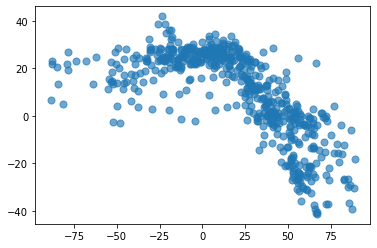

In [37]:
#SCATTER PLOT REAL
    #Temperature vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Temperature"], s=50, alpha=0.65)

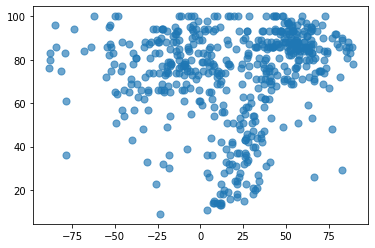

In [38]:
#SCATTER PLOT REAL
    #Humidity vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Humidity"], s=50, alpha=0.65)

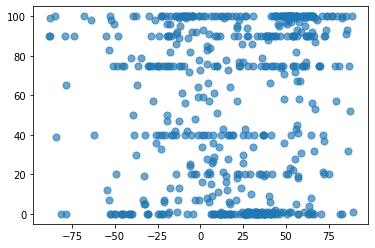

In [39]:
#SCATTER PLOT REAL
    #Cloudiness vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Cloudiness"], s=50, alpha=0.65)

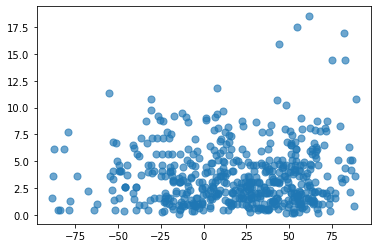

In [40]:
#SCATTER PLOT REAL
    #Wind Speed vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(coordsunique["Latitude"], coordsunique["Wind Speed"], s=50, alpha=0.65)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
#  Get the indices of cities that have humidity over 100%.


In [42]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [43]:
#create 2 data frames with lat <0 and lat >0

citynorth = coordsunique.loc[coordsunique["Latitude"] > 0, :]
citynorth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,41.49,20.51,debar,MK,2021-01-13 09:04:26,6.00,70.0,40.0,1.03
2,89.27,-167.79,barrow,US,2021-01-13 09:00:46,-18.00,78.0,1.0,10.80
3,22.43,-7.61,taoudenni,ML,2021-01-13 09:04:27,17.53,26.0,98.0,8.72
4,27.63,-155.91,ahuimanu,US,2021-01-13 09:03:29,24.05,73.0,90.0,2.06
7,7.53,-114.95,san patricio,US,2021-01-13 09:04:30,2.31,93.0,40.0,2.06
...,...,...,...,...,...,...,...,...,...
583,44.18,-110.46,jackson,US,2021-01-13 09:10:55,10.83,87.0,90.0,2.06
584,31.71,-48.18,saint george,US,2021-01-13 09:10:55,-1.00,40.0,1.0,0.60
585,16.96,-68.90,la romana,DO,2021-01-13 09:10:56,25.00,78.0,40.0,4.12
586,32.92,82.80,jumla,NP,2021-01-13 09:10:57,16.80,21.0,0.0,2.41


In [44]:
#create 2 data frames with lat <0 and lat >0

citysouth = coordsunique.loc[coordsunique["Latitude"] < 0, :]
citysouth

,Latitude,Longitude,City,Country,Date,Temperature,Humidity,Cloudiness,Wind Speed
5,-81.50,-49.78,ushuaia,AR,2021-01-13 09:00:49,5.00,75.0,0.0,6.17
6,-49.24,0.67,cape town,ZA,2021-01-13 09:04:28,28.70,51.0,20.0,4.12
10,-18.85,-122.45,rikitea,PF,2021-01-13 09:04:32,25.42,79.0,0.0,7.57
15,-78.68,78.01,busselton,AU,2021-01-13 09:03:35,26.79,36.0,0.0,0.45
20,-88.25,-10.55,hermanus,ZA,2021-01-13 09:02:36,23.33,80.0,99.0,3.58
...,...,...,...,...,...,...,...,...,...
558,-41.57,129.69,port lincoln,AU,2021-01-13 09:10:39,17.73,65.0,0.0,6.51
564,-7.11,150.56,kandrian,PG,2021-01-13 09:10:43,26.96,85.0,100.0,3.47
575,-26.50,174.38,vao,NC,2021-01-13 09:10:50,25.61,83.0,98.0,9.18
576,-45.93,-68.26,comodoro rivadavia,AR,2021-01-13 09:07:06,14.00,77.0,75.0,2.57


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

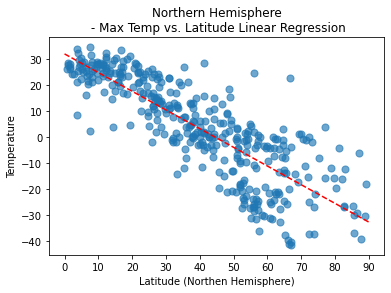

In [45]:
#Scatterplot with linear regression model


northtemp_slope, northtemp_int, northtemp_r, northtemp_p, northtemp_std_err = st.linregress(citynorth["Latitude"], citynorth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northtemp_fit = northtemp_slope * xlatnorth + northtemp_int


plt.scatter(citynorth["Latitude"], citynorth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northtemp_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Temperature')
plt.show()


In [46]:
northtemp_fit

array([ 31.89776304,  24.73105924,  17.56435544,  10.39765164,
         3.23094784,  -3.93575596, -11.10245976, -18.26916356,
       -25.43586736, -32.60257116])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

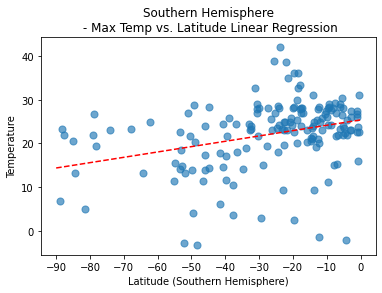

In [47]:
#Scatterplot with linear regression model


southtemp_slope, southtemp_int, southtemp_r, southtemp_p, southtemp_std_err = st.linregress(citysouth["Latitude"], citysouth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southtemp_fit = southtemp_slope * xlatsouth + southtemp_int


plt.scatter(citysouth["Latitude"], citysouth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southtemp_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Temperature')
plt.show()

In [48]:
xlatsouth

array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

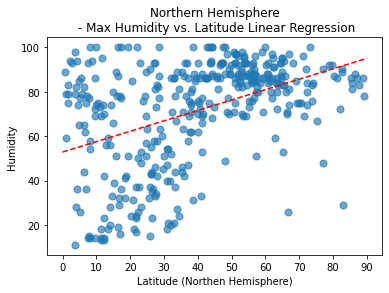

In [49]:
#Scatterplot with linear regression model


northhum_slope, northhum_int, northhum_r, northhum_p, northhum_std_err = st.linregress(citynorth["Latitude"], citynorth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
northhum_fit = northhum_slope * xlatnorth + northhum_int

xlatnorth = np.arange(0, 90+1, 10)
plt.scatter(citynorth["Latitude"], citynorth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northhum_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

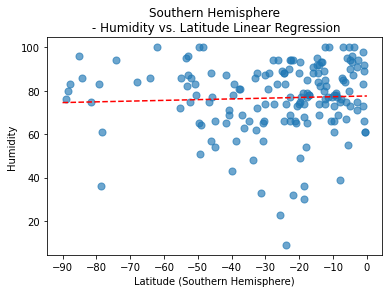

In [50]:
#Scatterplot with linear regression model


southhum_slope, southhum_int, southhum_r, southhum_p, southhum_std_err = st.linregress(citysouth["Latitude"], citysouth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southhum_fit = southhum_slope * xlatsouth + southhum_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southhum_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

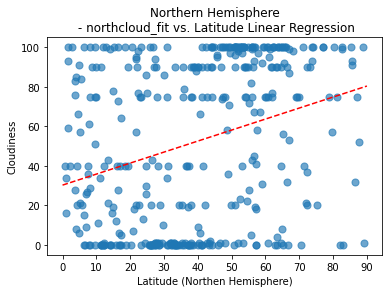

In [51]:
#Scatterplot with linear regression model


northcloud_slope, northcloud_int, northcloud_r, northcloud_p, northcloud_std_err = st.linregress(citynorth["Latitude"], citynorth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northcloud_fit = northcloud_slope * xlatnorth + northcloud_int

plt.scatter(citynorth["Latitude"], citynorth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northcloud_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - northcloud_fit vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

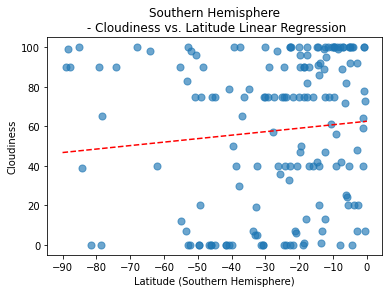

In [52]:
#Scatterplot with linear regression model

southcloud_slope, southcloud_int, southcloud_r, southcloud_p, southcloud_std_err = st.linregress(citysouth["Latitude"], citysouth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southcloud_fit = southcloud_slope * xlatsouth + southcloud_int


plt.scatter(citysouth["Latitude"], citysouth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southcloud_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

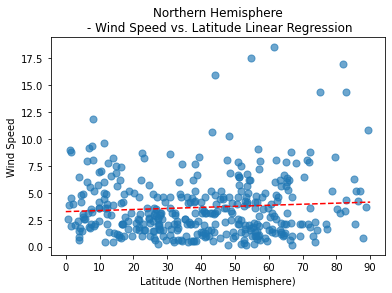

In [53]:
#Scatterplot with linear regression model


northwind_slope, northwind_int, northwind_r, northwind_p, northwind_std_err = st.linregress(citynorth["Latitude"], citynorth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northwind_fit = northwind_slope * xlatnorth + northwind_int


plt.scatter(citynorth["Latitude"], citynorth["Wind Speed"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northwind_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

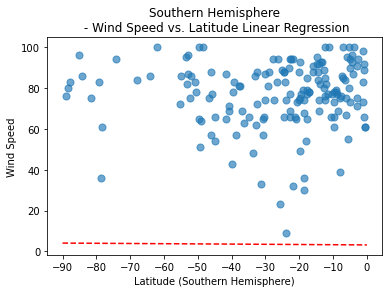

In [54]:
#Scatterplot with linear regression model


southwind_slope, southwind_int, southwind_r, southwind_p, southwind_std_err = st.linregress(citysouth["Latitude"], citysouth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southwind_fit = southwind_slope * xlatsouth + southwind_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southwind_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed')
plt.show()